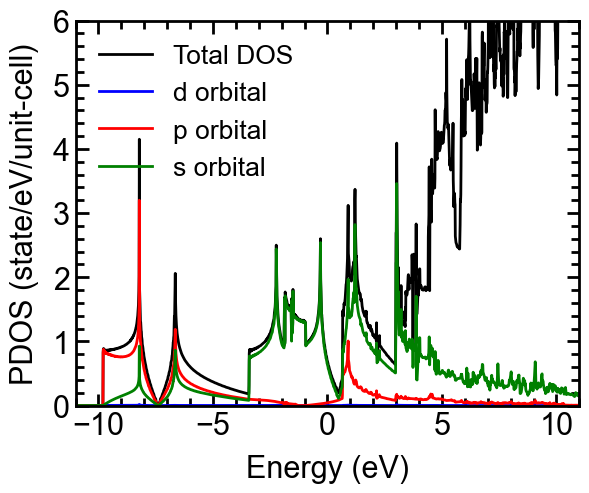

In [3]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
plt.style.use('../../matplotlib/sci.mplstyle')
import numpy as np

# The Fermi energy, find it in nscf.out
efermi = -2.4054

# Define the function to read the data file
def r_dos(name):
    ener, dos = np.loadtxt(name, usecols=(0,1), unpack=True)
    return ener, dos

# Open and read the total PDOS
ener, dos = r_dos('stanene.pdos_tot')
# Open and read the PDOS files for C atom number 1
ener1, p1C1d = r_dos('stanene.pdos_atm#1(Sn)_wfc#1(d)')
ener1, p1C2s = r_dos('stanene.pdos_atm#1(Sn)_wfc#2(s)')
ener1, p1C3p = r_dos('stanene.pdos_atm#1(Sn)_wfc#3(p)')
# Open and read the PDOS files for C atom number 2
ener2, p2C1d = r_dos('stanene.pdos_atm#2(Sn)_wfc#1(d)')
ener2, p2C2s = r_dos('stanene.pdos_atm#2(Sn)_wfc#2(s)')
ener2, p2C3p = r_dos('stanene.pdos_atm#2(Sn)_wfc#3(p)')

# Create figure object
plt.figure()
# Plot the DOS
plt.plot(ener-efermi, dos, c='k', label='Total DOS')
# Plot the PDOS of d-orbital
plt.plot(ener1-efermi, p1C1d+p2C1d, c='b', label='d orbital')
# Plot the PDOS of s-orbital
plt.plot(ener2-efermi, p1C2s+p2C2s, c='r', label='p orbital')
# Plot the PDOS of p-orbital
plt.plot(ener2-efermi, p1C3p+p2C3p, c='g', label='s orbital')
# Add the x and y-axis labels
plt.xlabel('Energy (eV)')
plt.ylabel('PDOS (state/eV/unit-cell)')
# Set the axis limits
plt.xlim(-11, 11)
plt.ylim(0, 6)
# Save the figure
plt.savefig('graph_sn_pdos.jpg')
# Show the figure
plt.legend(frameon=False)
plt.show()